# Telecom Industry, Why Customers Churn ? 

### Objective of the Project

This challenge consists of assisting a company in improving customer retention by identifying high value customers, churn risks and bring it on recommendations to the Maven Company.


    


### Understanding the problem

Customer Churn : Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. In the Maven's case, we are looking for the customers who interrupted their subscription services.

Here are the following questions which structured and led my analysis : <br><br>
    - How many customers joined the company during the last quarter? How many customers joined? <br><br>
    - What is the customer profile for a customer that churned, joined, and stayed? Are they different? <br><br>
    - What seem to be the key drivers of customer churn? <br><br>
    - Is the company losing high value customers? If so, how can they retain them? <br>
    

# I - LIBRARIES IMPORT & DATA SET CREATION

 I am importing all the required libraries, and I firstly imported the data set in mySQL workbench and then I am using a connector to get the data and setup the data set in Python. 

In [216]:
# I am importing all the required libraries 

import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

In [217]:
df = pd.read_csv('telecom_customer_churn.csv')

Here is a quick glance and check of the DF information.

In [218]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [219]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# II - DATA CLEANING 

In this step, I checked for duplicate values, missing values, wrong formatting, and inconsistent formatting. <br>
First I will uniformize the name of the columns and drop the columns which won't be useful.

In [220]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.drop( columns=['zip_code','latitude','longitude'], inplace=True)

I will also drop the index and I will use the customer_id as an index.

In [221]:
df.set_index('customer_id',inplace=True)

Now I will check for the missing values in 'churn_category' and 'churn_reason', eventually I will replace the missing one by 'no_churn' for those who stayed.

In [222]:
df.loc[(df.customer_status == 'Joined') | (df.customer_status == 'Stayed'),['churn_category','churn_reason']] = 'no churn'

# III - DATA EXPLORATION

### <b> How many customers joined the company during the last quarter? How many customers joined?

In [223]:
customers_joined_last_quarter = df.loc[df.tenure_in_months <= 3].count().unique()[0] #all the customers that joined in the past 3 months even those who churned
customers_cs_joined_last_quart = df.loc[df.customer_status == 'Joined'].count().unique()[0] #joined only customers during the quarter

In [224]:
customer_churned_last_quarter = df.loc[(df.customer_status == 'Churned') & (df.tenure_in_months <= 3) ].count().unique()[0]
customer_churned_total = df.loc[df.customer_status =='Churned'].count().unique()[0]

In [225]:
joined_over_churn_last_quarter = (customers_cs_joined_last_quart,customer_churned_last_quarter)
labels = ('Customers who joined','Customer who churned')

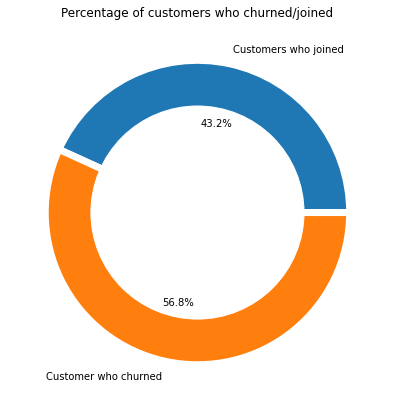

In [226]:
plt.figure(figsize=(15,7))
plt.pie(joined_over_churn_last_quarter,labels = labels,wedgeprops={ 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of customers who churned/joined')
plt.show()

As we can see there are more customers who churned that joined during the last quarter. I will compare it to the total of customers to have an idea of the proportion during the last quarter.

In [227]:
total_nb_customers = df.count()[0]

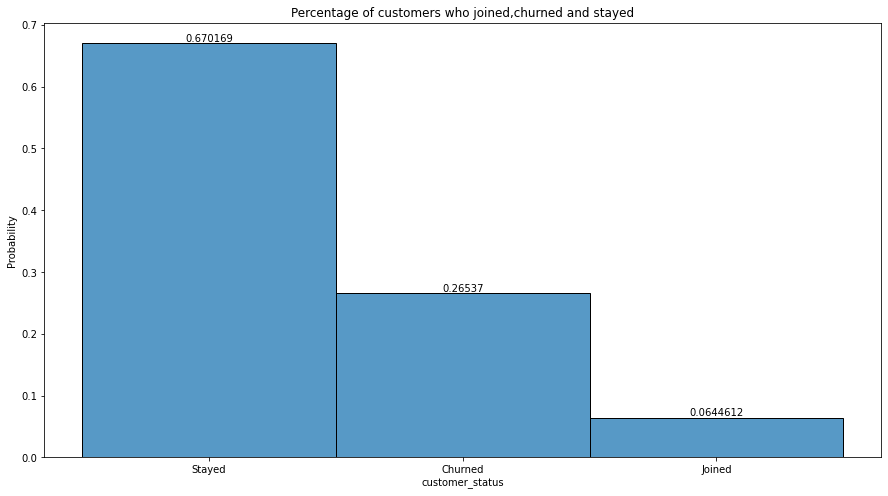

In [228]:
fig, ax = plt.subplots(figsize=(15,8))
sns.color_palette("flare", as_cmap=True)
ax = sns.histplot(df , x=df.customer_status, stat='probability')
ax.bar_label(ax.containers[0])
ax.set_title('Percentage of customers who joined,churned and stayed')
plt.show()

Basically only <b>6,45%</b> of the customers just joined, <b>26.53%</b> churned and <b>67%</b> stayed during the last quarter. 

In [229]:
total_growth_rate = round(customers_joined_last_quarter / total_nb_customers,4 )*100
total_churn_rate = round(customer_churned_total / total_nb_customers,3)*100
net_customer_loss = round(total_churn_rate - total_growth_rate,3)
print('total_growth_rate = {0}% \ntotal_churn_rate = {1}% \nnet_customer_loss = {2}%'.format(total_growth_rate,total_churn_rate,net_customer_loss))

total_growth_rate = 14.92% 
total_churn_rate = 26.5% 
net_customer_loss = 11.58%


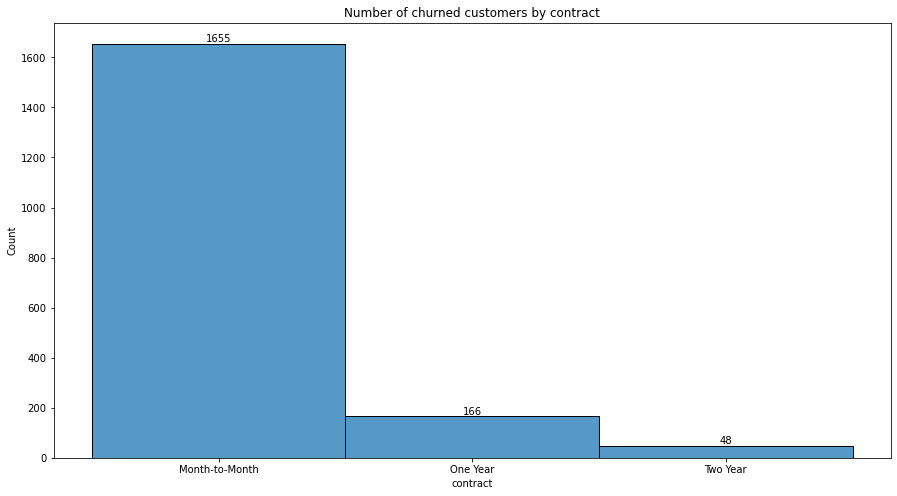

In [230]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.histplot(df.loc[df.customer_status =='Churned'], x=df.loc[df.customer_status =='Churned','contract'])
ax.bar_label(ax.containers[0])
ax.set_title('Number of churned customers by contract')
plt.show()

As we can see most of the customers who churned are monthly contracted to the company. It is quite logical given the fact that when you are commited with the company for one year you cannot churn easily. Indeed you will be forced to pay for all the fees whereas if you are under a monthly contract then you only have to wait for the end of one month and do not extend it.

#### <b> Why our customers churned ? </b>

In [231]:
df_churn_reason = df.groupby(['churn_reason']).size().sort_values()

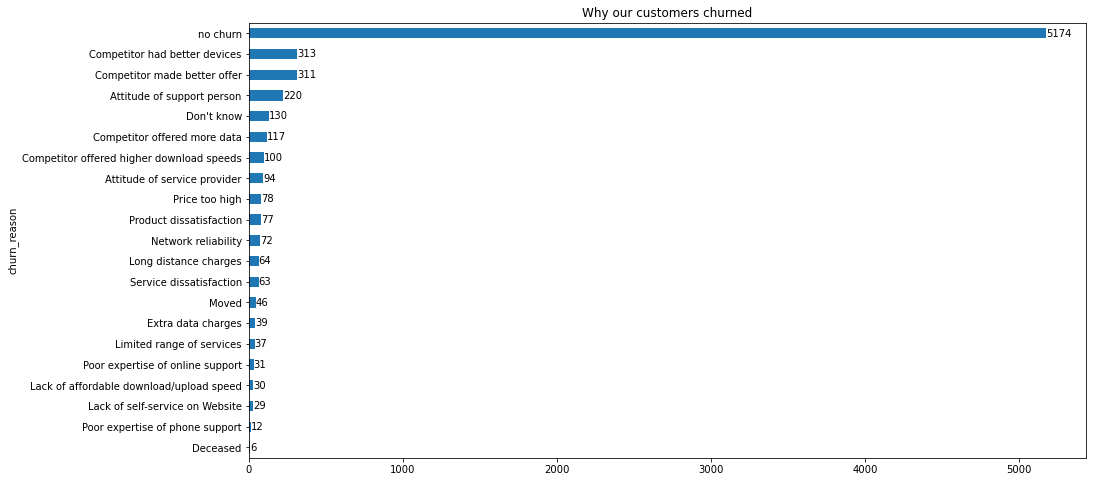

In [232]:
fig = plt.subplots(figsize=(15,8))
ax = df_churn_reason.plot(kind='barh')
ax.bar_label(ax.containers[0])
ax.set_title('Why our customers churned')
plt.show()

There are 3 top reason which are about either competitors or the company. Basically competition is all about competitive advantage and better offers, devices or services. Basically, the company could work on their support service and their offers/devices to face the competition better.

#### <b> Where our customers churned ? </b>

In [233]:
df_churn_localization = df.loc[df.customer_status == 'Churned'].groupby(['city']).size().sort_values(ascending = False).head(6)

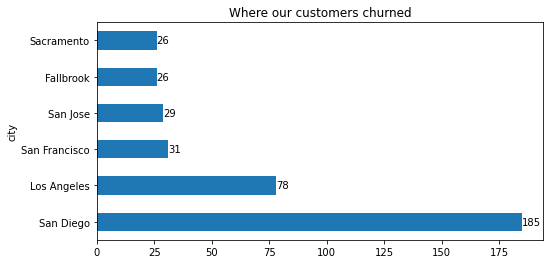

In [234]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1 = df_churn_localization.plot(kind='barh')
ax1.bar_label(ax1.containers[0])
ax1.set_title('Where our customers churned')
plt.show()

Here I wanted to obtain more information about the churn reasons in San Diego to see if there is something different from this peculiar city.

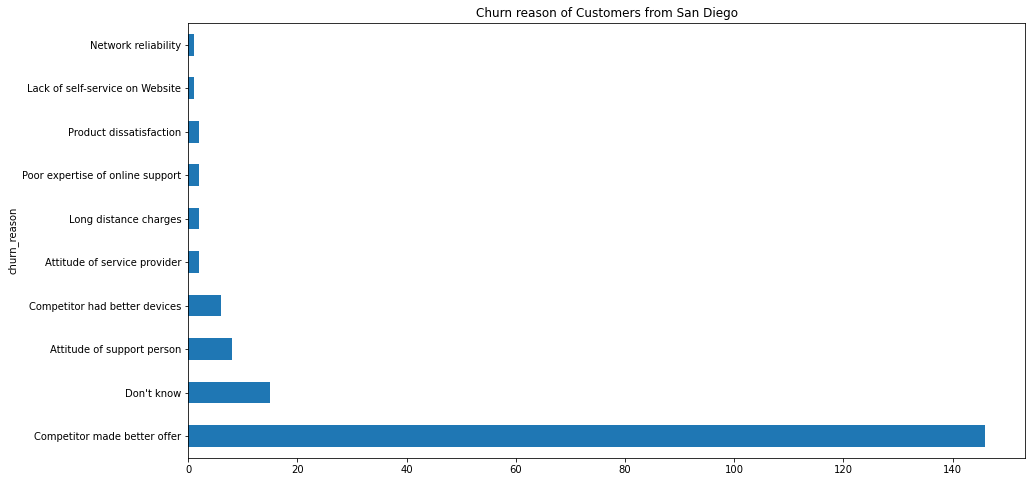

In [235]:
fig, ax = plt.subplots(figsize=(15,8))
ax = df.loc[(df.city == 'San Diego') & (df.customer_status =='Churned')].groupby('churn_reason').size().sort_values(ascending=False).plot(kind='barh')
ax.set_title('Churn reason of Customers from San Diego')
plt.show()

As we can see San Diego is the city where the churn rate is the highest. As the plot confirms, the main reason is due to a better competitor. It is providing a better offer, so the only option for the telecom company is to create a special offer for the San Diego' Customers or to change the current offer there to adapt to the competition in order to reduce the churn rate. I could eventually keep on diving on San Diego to compare the revenue from this city to the total revenue and then consider if it is a good choice or not to give up this city or work on improving the offer (For the curious ones, San Diego represents roughly 4% of the total revenue of the telecom company).

#### <b> Which offer is most likely implying our customers to churn ? </b>

In [236]:
df_churn_offer = df.loc[df.customer_status == 'Churned'].groupby(['offer']).size().sort_values(ascending = False).head(6)

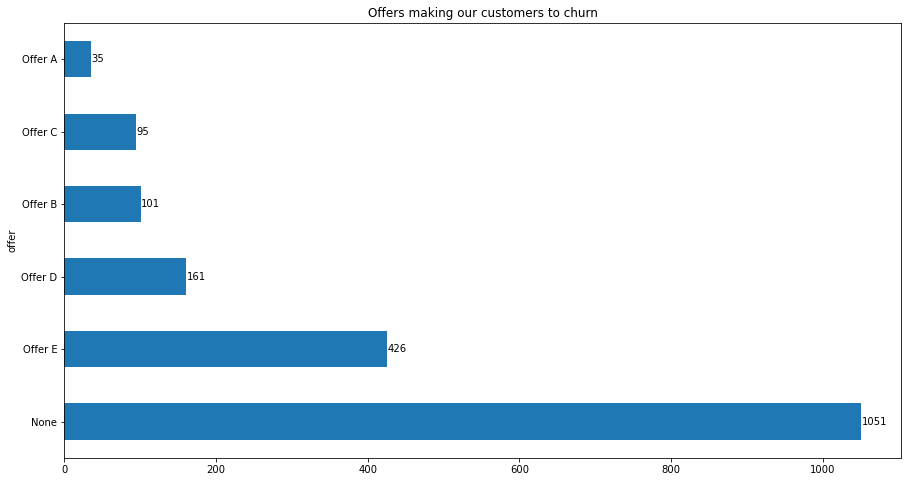

In [237]:
fig, ax = plt.subplots(figsize=(15,8))
ax = df_churn_offer.plot(kind='barh')
ax.bar_label(ax.containers[0])
ax.set_title('Offers making our customers to churn')
plt.show()

In [238]:
df.loc[(df.offer == 'Offer E') & (df.customer_status == 'Churned')].groupby('churn_reason').size().sort_values(ascending = False)

churn_reason
Competitor made better offer                 78
Competitor had better devices                77
Attitude of support person                   54
Attitude of service provider                 31
Competitor offered higher download speeds    23
Competitor offered more data                 23
Don't know                                   23
Long distance charges                        20
Network reliability                          17
Price too high                               13
Moved                                        12
Product dissatisfaction                       9
Service dissatisfaction                       9
Limited range of services                     8
Extra data charges                            8
Lack of affordable download/upload speed      7
Poor expertise of online support              6
Lack of self-service on Website               5
Poor expertise of phone support               2
Deceased                                      1
dtype: int64

<b>The Offer E</b> is clearly the one which is implying the highest Churn Rate. I wanted to dive slightly deeper to check what are the main reason. As I expected the competitors are still the top reason but there is a surprising new reason which is the attitude of the service provider. Basically the service provider and support person are the same reason but that just mean there is a clear problem among the customer services in this customer which must be resolved quickly to prevent customers' churn.

### <b>2 - What is the customer profile for a customer that churned, joined, and stayed? Are they different?

To examine the different customer profile we can firstly compare the percentage of man/women, the age, their marital status, the number of dependents, we can also give an attention to their localization and display it on the map of California. So I will take a few characteristic to create customer profile which could be attributed to their current status. 

First, I am going to create age category to get a proper view of the age distribution

In [240]:
age_bins = [18, 25, 35, 45, 55 , 65, 90]

In [241]:
cats = pd.cut(df.age,bins=age_bins)

In [242]:
df['age_cat']=cats

#### <b> Churned Customer Profile : 

In [243]:
df.loc[df.customer_status == 'Churned'].groupby(['gender','age_cat','married','number_of_dependents','number_of_referrals','offer','contract','internet_type',]).size().sort_values(ascending = False)

gender  age_cat   married  number_of_dependents  number_of_referrals  offer    contract        internet_type
Female  (65, 90]  No       0                     0                    None     Month-to-Month  Fiber Optic      73
Male    (65, 90]  No       0                     0                    None     Month-to-Month  Fiber Optic      49
Female  (35, 45]  No       0                     0                    None     Month-to-Month  Fiber Optic      36
        (25, 35]  No       0                     0                    None     Month-to-Month  Fiber Optic      35
        (45, 55]  No       0                     0                    None     Month-to-Month  Fiber Optic      34
                                                                                                                ..
        (55, 65]  No       0                     3                    Offer C  Month-to-Month  DSL               0
                                                                                      

I used a few characteristics to determine what could be the perfect Churned Customer Profile. Basically, one could have added several more features to obtain an even more accurate profile. The results is that the Churned Customer profile is a <b> women who is over 65 years old, who's not married, without any dependents nor referrals, without any specific offer and using a fiber optic.

#### <b> Stayed Customer Profile : 

In [244]:
df.loc[df.customer_status == 'Stayed'].groupby(['gender','age_cat','married','number_of_dependents','number_of_referrals','offer','contract','internet_type',]).size().sort_values(ascending = False)

gender  age_cat   married  number_of_dependents  number_of_referrals  offer    contract        internet_type
Female  (65, 90]  No       0                     0                    None     Two Year        Fiber Optic      27
Male    (45, 55]  No       0                     0                    None     Month-to-Month  Fiber Optic      25
        (65, 90]  No       0                     0                    None     Two Year        Fiber Optic      24
        (55, 65]  No       0                     0                    None     Month-to-Month  Fiber Optic      21
Female  (45, 55]  No       0                     0                    None     Month-to-Month  Fiber Optic      20
                                                                                                                ..
        (55, 65]  No       1                     0                    Offer A  Month-to-Month  DSL               0
                                                                                      

As we can witness, the result is similar to the main profile who churned. Indeed it is again a women who is over 65 years old but there is a slight difference, the nature of the contract. There it's a two year contract whereas for the churned customer profile it was a month-to-month contract which it makes it simpler to terminate.

#### <b> Joined Customer Profile : 

In [245]:
df.loc[df.customer_status == 'Joined'].groupby(['gender','age_cat','married','number_of_dependents','number_of_referrals','offer','contract','internet_type',]).size().sort_values(ascending = False)

gender  age_cat   married  number_of_dependents  number_of_referrals  offer    contract        internet_type
Female  (45, 55]  No       0                     0                    None     Month-to-Month  Fiber Optic      10
Male    (35, 45]  No       0                     0                    None     Month-to-Month  DSL               8
        (18, 25]  No       0                     0                    None     Month-to-Month  DSL               7
Female  (35, 45]  No       0                     0                    None     Month-to-Month  DSL               7
Male    (35, 45]  No       0                     0                    Offer E  Month-to-Month  DSL               7
                                                                                                                ..
Female  (55, 65]  No       0                     1                    None     One Year        Fiber Optic       0
                                                                                      

There we have a more interesting result. This time the Joined type profile is a man or a women who is between 25 and 35, which means a relatively young man, who is not married and has not dependents nor referrals. It is also a monthly mobile phone contract. But as we can see the main joiner are monthly based contracts. 

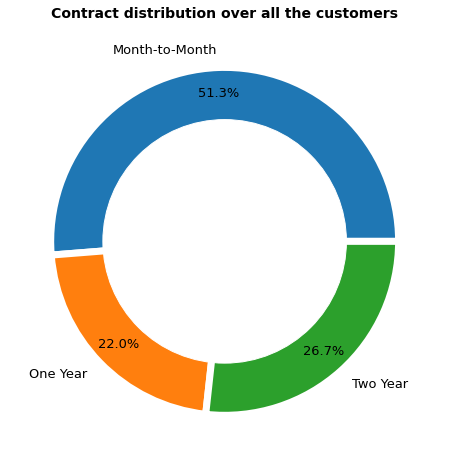

In [246]:
fig, ax = plt.subplots(figsize=(15,8))
ax.pie(df.groupby('contract').size(),labels=('Month-to-Month','One Year','Two Year'),
        wedgeprops={ 'linewidth' : 7, 'edgecolor' : 'white' },
        autopct='%1.1f%%',pctdistance=0.85,labeldistance=1.1, textprops={'fontsize': 13})
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
ax.set_title('Contract distribution over all the customers', fontdict={'fontsize': 14,'fontweight': 'bold'})
plt.show()

Here we could get an interesting feedback, as we can see more than the half of the contracts are monthly based, which means most of our customers are not considered being commited with us for long period. That also means that the monthly contract seems way more attractive which can be considered normal. Indeed people wants to be able to choose when to leave if it does not go as expected. There is something to do here to improve the interest for a long term contract, proposing proper services or offer, reducing the price or anything that could make the long period offer more interesting.

### <b>3 - What seem to be the key drivers of customer churn?

Here, we need to look at what makes the customer to churn, basically we can look for the churn reason, and we can also pay attention to the different offer and their impact on the churn rate. We might eventually find what are the worst offer and if so we most likely change the unproper ones.

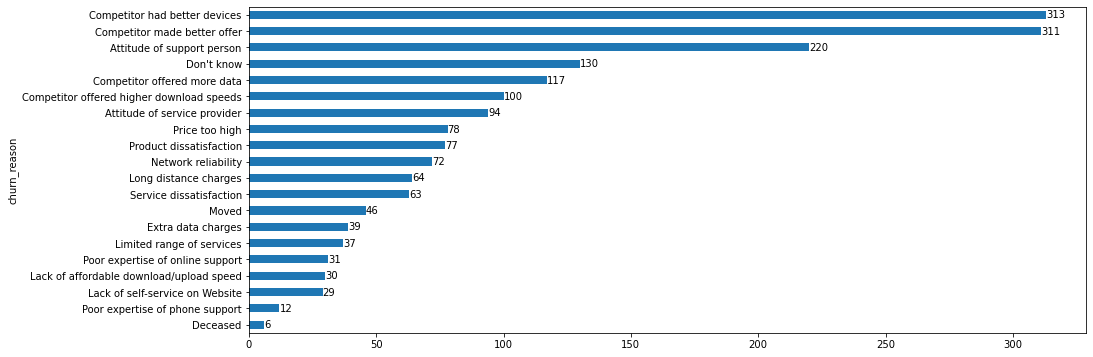

In [247]:
fig, ax = plt.subplots(figsize=(15,6))
ax = df.groupby('churn_reason').size().drop('no churn').sort_values(ascending = True ).plot(kind = 'barh')
ax.bar_label(ax.containers[0])
plt.show()

As we can see the 2 top reason are about the competitors who have either better devices or better offers. And the third reason is about the customer service which seems to be poor. 
Basically, the first two can be corrected by improving the quality of the devices and working on offer to propose something slightly more attractive. A competitor benchmark could be useful to compare the different available offers.
When it comes to the support service, there must be something wrong, the company shall check within its team what's wrong, and eventually fire the responsible for these bads feedbacks. 

In [248]:
df_offer_value = df.groupby(['customer_status','offer']).size().unstack().drop(columns='None')

Here we can notice that the 'None' characteristic is more represented than every other ones, basically that means most of the customers are either not using a specific offer or there are missing datas. If that the first case then the company must propose an appropriate offer. For the analysis purpose I will drop the 'None' column.

In [249]:
df_offer_value

offer,Offer A,Offer B,Offer C,Offer D,Offer E
customer_status,,,,,
Churned,35.0,101.0,95.0,161.0,426.0
Joined,NaN,NaN,NaN,NaN,175.0
Stayed,485.0,723.0,320.0,441.0,204.0


In [250]:
df_offer_value = df_offer_value.reset_index().melt(id_vars='customer_status')

In [251]:
df_offer_value.sort_values('customer_status')

,customer_status,offer,value
0,Churned,Offer A,35.0
3,Churned,Offer B,101.0
6,Churned,Offer C,95.0
9,Churned,Offer D,161.0
12,Churned,Offer E,426.0
1,Joined,Offer A,NaN
4,Joined,Offer B,NaN
7,Joined,Offer C,NaN
10,Joined,Offer D,NaN
13,Joined,Offer E,175.0


In [252]:
df_offer_value.loc[df_offer_value.customer_status == 'Churned',('offer','value')].set_index('offer')

,value
offer,
Offer A,35.0
Offer B,101.0
Offer C,95.0
Offer D,161.0
Offer E,426.0


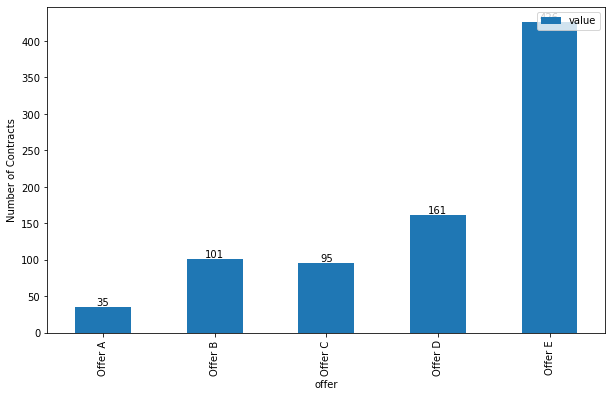

In [253]:
ax = df_offer_value.loc[df_offer_value.customer_status == 'Churned',('offer','value')].set_index('offer').plot.bar()

fig = ax.get_figure()
fig.set_size_inches(10,6)

ax.set_xlabel("offer")
ax.set_ylabel("Number of Contracts")
ax.legend(loc = 'upper right')
ax.tick_params()

for element in range(len(ax.containers)):
    ax.bar_label(ax.containers[element])
plt.show()

Here we can notice a huge difference between the offers among the customers who churned. Indeed , the Offer E is the one with the highest number or customers who churned. Thus we can legitimately conclude this offer is the worst one and must be either replaced or modified. Indeed if the company manages to adapt and improve this offer it could drastically improve the customer retention. 

### <b>4 - Is the company losing high value customers? If so, how can they retain them?</b>

Here I will consider all the columns that refer to the charges, revenue and refund. So first let's create a new dataframe containing all these information to make it simpler.

In [254]:
df_customers_value = df.loc[:,['number_of_dependents','tenure_in_months','avg_monthly_long_distance_charges','monthly_charge','total_charges','total_refunds','total_extra_data_charges','total_long_distance_charges','total_revenue','customer_status']]

In [255]:
df_customers_value.total_revenue.mean()

3034.379055800087

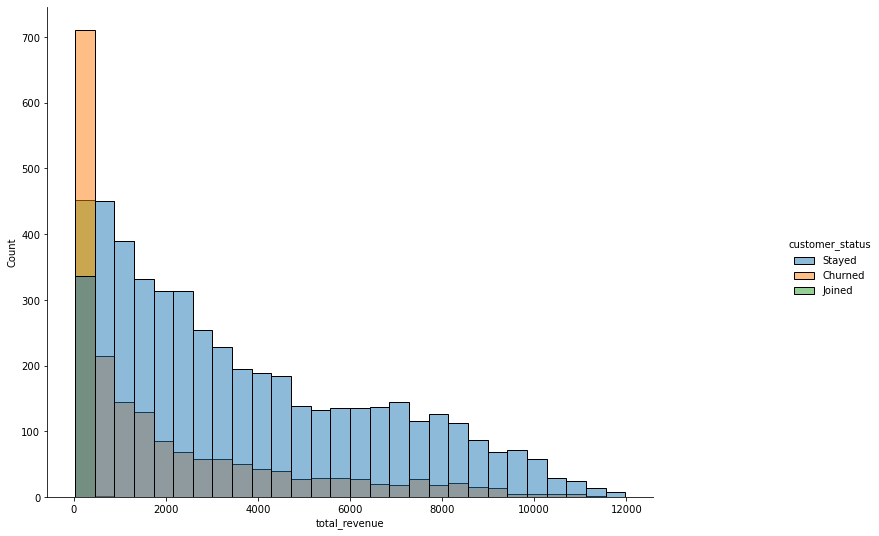

In [256]:
sns.displot(df,x='total_revenue',hue='customer_status')
plt.gcf().set_size_inches(13, 8)
plt.show()

Here I am calculating the total revenue, the cumulative revenue and the cumulative revenue divided by the sum of the total_revenue. Likewise, I will be able to get information about what we can call high value customers and low value customers.

In [257]:
df.sort_values(ascending=False, by = 'total_revenue', inplace=True)

In [258]:
df['cumulative_revenue'] = df['total_revenue'].cumsum()

In [259]:
df['percent'] = df['cumulative_revenue'] / df['total_revenue'].sum()

In [260]:
df

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,age_cat,cumulative_revenue,percent
customer_id,,,,,,,,,,,,,,,,,,,,,
0164-APGRB,Female,56,No,0,Calistoga,0,72,Offer A,Yes,48.37,...,0.00,0,3482.64,11979.34,Stayed,no churn,no churn,"(55, 65]",11979.34,0.000561
8263-QMNTJ,Male,46,Yes,0,San Francisco,2,72,Offer A,Yes,47.82,...,0.00,0,3443.04,11868.34,Stayed,no churn,no churn,"(45, 55]",23847.68,0.001116
5451-YHYPW,Female,75,Yes,0,San Francisco,2,72,Offer A,Yes,44.89,...,0.00,120,3232.08,11795.78,Stayed,no churn,no churn,"(65, 90]",35643.46,0.001668
3810-DVDQQ,Female,28,Yes,1,Shasta Lake,10,72,None,Yes,47.02,...,5.44,0,3385.44,11688.90,Stayed,no churn,no churn,"(25, 35]",47332.36,0.002215
7569-NMZYQ,Female,33,Yes,3,Middletown,1,72,None,Yes,41.14,...,0.00,0,2962.08,11634.53,Stayed,no churn,no churn,"(25, 35]",58966.89,0.002759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088-QZLRL,Male,50,No,0,Corona,0,1,Offer E,Yes,1.47,...,0.00,0,1.47,22.12,Joined,no churn,no churn,"(45, 55]",21371045.24,0.999996
3976-NLDEZ,Male,55,No,0,Mira Loma,0,1,Offer E,Yes,1.48,...,0.00,0,1.48,22.08,Joined,no churn,no churn,"(45, 55]",21371067.32,0.999997
6615-ZGEDR,Male,42,No,0,Smith River,0,1,None,Yes,1.91,...,0.00,0,1.91,21.61,Churned,Attitude,Attitude of service provider,"(35, 45]",21371088.93,0.999998


In [261]:
df.loc[df.percent <= 0.80].count()[0]

2873

In [262]:
df.loc[df.percent <= 0.80].count()[0]/df.customer_status.count()

0.40792276018742013

Practically, we have <b>40.7% of the customers who are responsible for the 80% of the revenue</b>. And the remaining 60% are only responsible for the 20% of the revenue, so we can consider that these 40% are high value customers. Now I will look for further information about these customers by studying their status, their contracts and so on.

In [263]:
df_high_value = df.loc[(df.customer_status!= 'Churned') & (df.percent <= 0.80)]


In [268]:
df_high_value.head()

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,age_cat,cumulative_revenue,percent
customer_id,,,,,,,,,,,,,,,,,,,,,
0164-APGRB,Female,56,No,0,Calistoga,0,72,Offer A,Yes,48.37,...,0.00,0,3482.64,11979.34,Stayed,no churn,no churn,"(55, 65]",11979.34,0.000561
8263-QMNTJ,Male,46,Yes,0,San Francisco,2,72,Offer A,Yes,47.82,...,0.00,0,3443.04,11868.34,Stayed,no churn,no churn,"(45, 55]",23847.68,0.001116
5451-YHYPW,Female,75,Yes,0,San Francisco,2,72,Offer A,Yes,44.89,...,0.00,120,3232.08,11795.78,Stayed,no churn,no churn,"(65, 90]",35643.46,0.001668
3810-DVDQQ,Female,28,Yes,1,Shasta Lake,10,72,None,Yes,47.02,...,5.44,0,3385.44,11688.90,Stayed,no churn,no churn,"(25, 35]",47332.36,0.002215
7569-NMZYQ,Female,33,Yes,3,Middletown,1,72,None,Yes,41.14,...,0.00,0,2962.08,11634.53,Stayed,no churn,no churn,"(25, 35]",58966.89,0.002759


Here I am plotting all the numeric columns to display the characteristics of the High Value Customers 

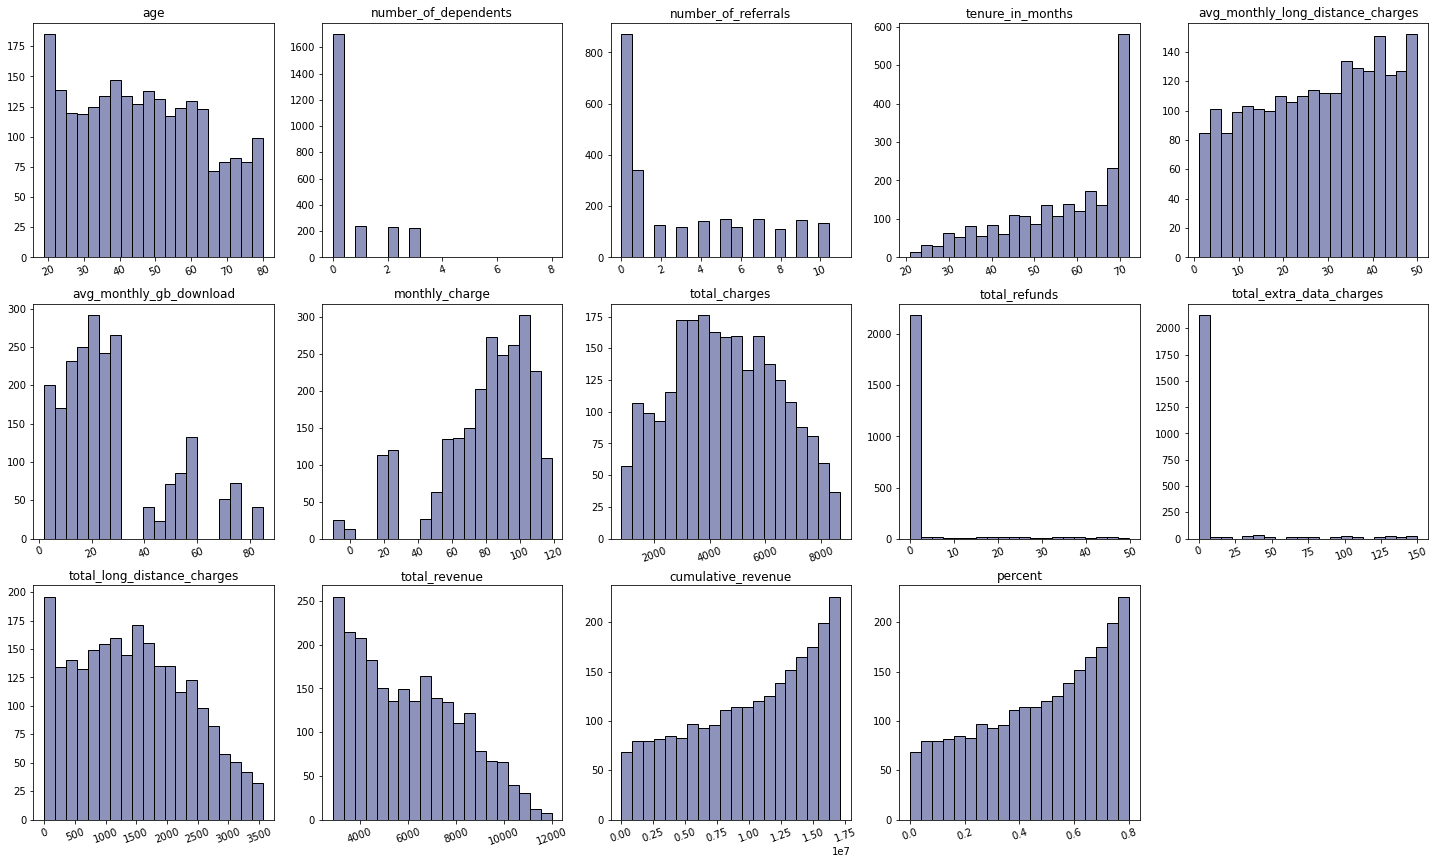

In [279]:
numc = [cname for cname in df_high_value.columns if df_high_value[cname].dtypes in ['int64', 'float64']]
fig = plt.figure(figsize = (25, 25))

i = 1
for n in numc:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df_high_value[n], color = '#676FA3', bins = 20)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

Here I am plotting all the object columns to display the characteristics of the High Value Customers 

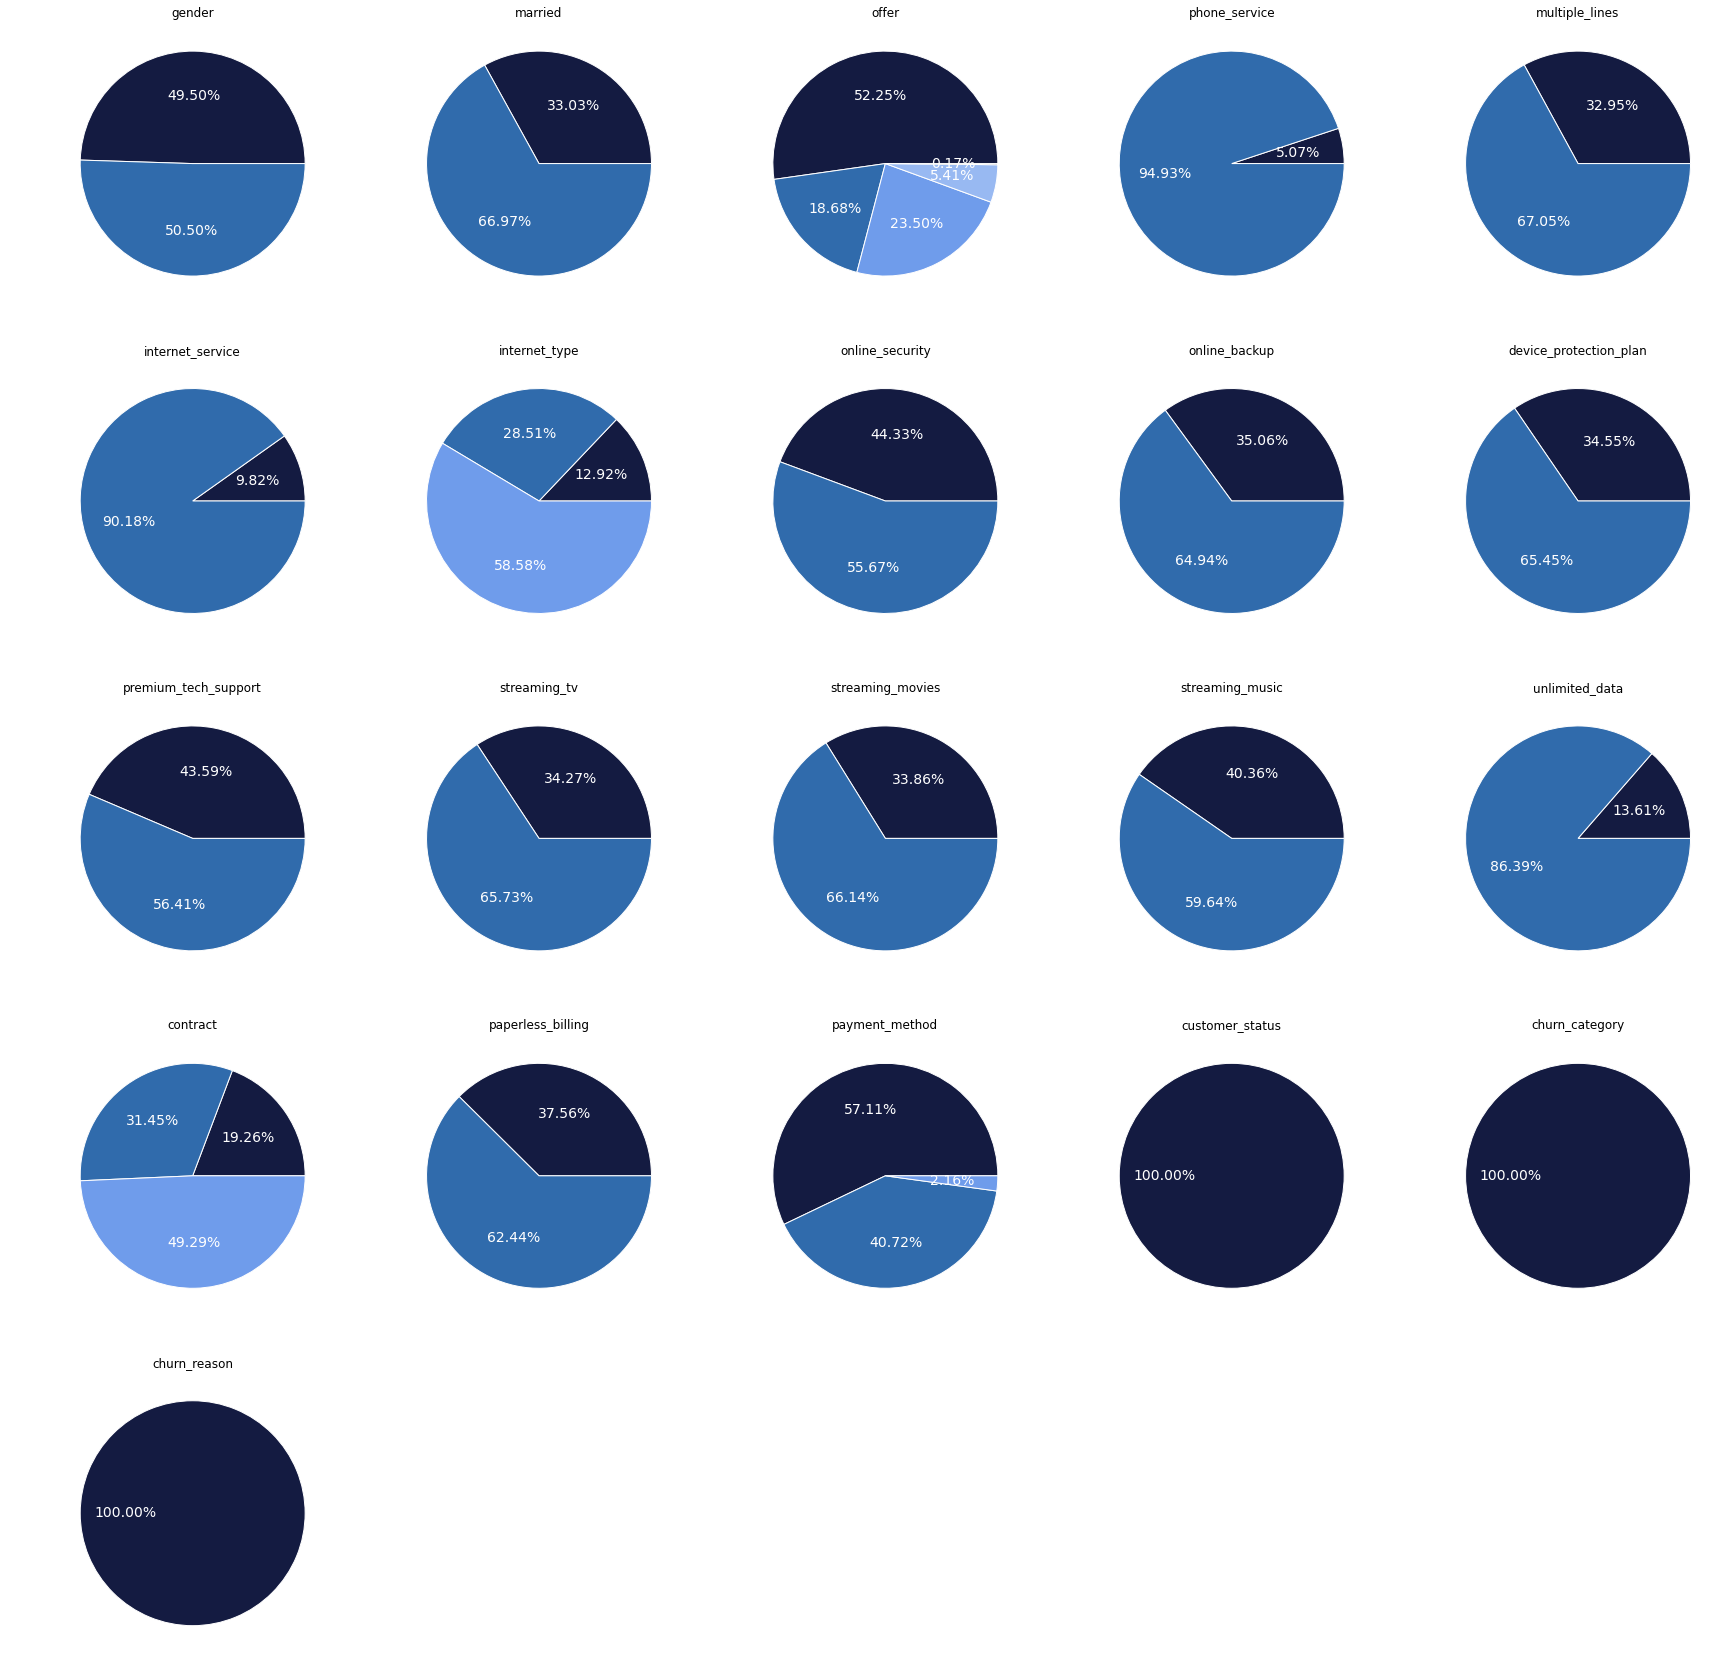

In [283]:

cat = [cname for cname in df_high_value.columns if df_high_value[cname].nunique() < 10 and df_high_value[cname].dtype == "object"]

fig = plt.figure(figsize = (30, 30))

i = 1
for c in cat:
    plt.subplot(5, 5, i)
    ax = df_high_value.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = ['#141B41', '#306BAC','#6F9CEB', '#98B9F2'],
                                                wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white' },
                                               textprops = {'color':'white','size': '14'})
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    i += 1



#### Insights :

- As we could expect, <b>the tenure in month</b> is quite high.
- Most of the High Value customers use phone service and internet service.
- <b>Two Year contract</b> is the most common which is quite logical as it is correlated with the tenure in month characteristic
- Most of them are using all the services such as streaming TV, Movies and Music , as the unlimited data. 
- <b>67%</b> of the customers are married
- Offer E was not bought by any of the high value Customers.

Now let's dive into the high value customers who churned and let's check what is wrong and what are the churn reasons.

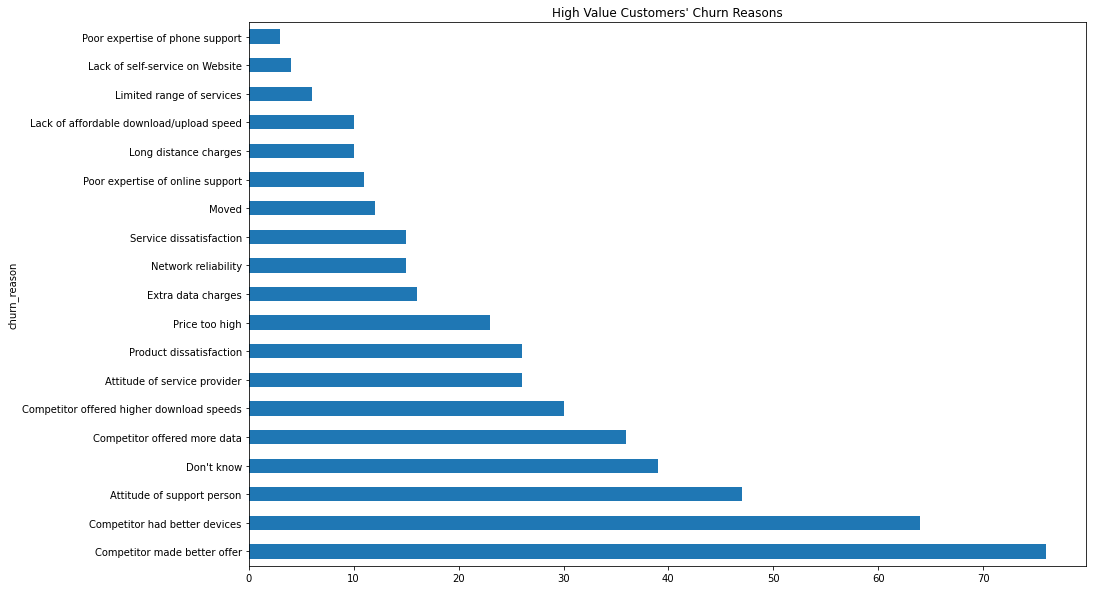

In [356]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = df.loc[(df.percent <= 0.80) & (df.customer_status == 'Churned')].groupby('churn_reason').size().sort_values(ascending=False).plot(kind='barh')
ax.set_title("High Value Customers' Churn Reasons")
plt.show()

As we can see, here again the main reason, is about competition. Indeed, competitors seem to make better offer and devices, and provide better options such as more data or download speeds. We can also notice that the 'Attitude of support person' is also in cause. To prevent the company from losing high value customers they definitely should work on their support service, and improve the quality of their devices and offers. Basically they could also improve the data quantity but when it comes to download speeds it does not rely completely on them. Eventually, they could slightly lower the price to get a better offer and prevent people from churning.

### Final Words

As a conclusion, there are 3 main strategic points Maven should tackle : <br>
    <br> - How can they convert low-value profile to higher-value profile ? <br>
    <br>- What are the main areas of improvement ? <br>
    <br>- What are the possible source of growth ?

<b><i>How can they convert low-value profile to higher-value profile ?

I suggest to Maven to focus themselves on a longer contract such as one or two years contract as they are the best type of contract. They should propose to the low value profile alternative for a longer contract with interesting promotions or services that would make it cheaper on the long run for the customer. It would mechanically reduce the Churn Rate. 
Also , there were a lot of churn reason which were about the customer service, thus Maven must operates in this area and correct what is wrong to prevent the customer to churn due to a poor attitude.

<b><i> What are the main areas of improvement ?

As mentionned above, the customer service is top priority area of improvement as it is responsible for an high level of churn. Moreover, all the techical parts such as connexion quality and quality of devices could be slightly improve as they are two main reason of the churn rate. Eventually working on their services quality would help them facing the competition.

<b><i>What are the possible source of growth ?

As mentionned, customer service and technical support should be trained to faced these 'Attitude of support person' churn reason. 
There are also source such as new places, for example there are several cities where Maven could develop its offer to obtain more market stakes as they are not well implanted in certain cities. 
They could also improve the retribution for the referral in order to improve the customer loyalty et reduce the churn rate.